In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('../data/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

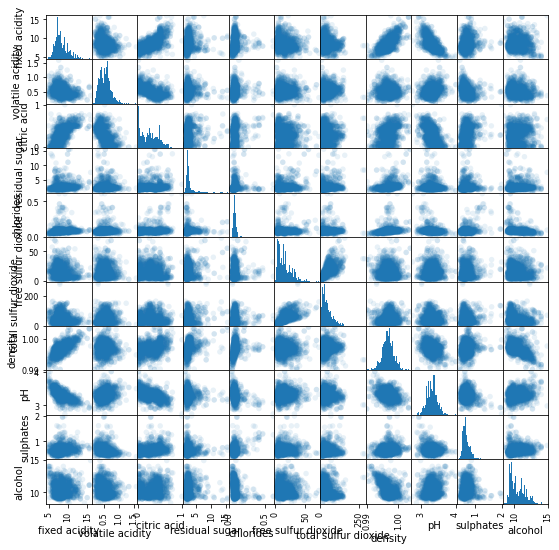

In [4]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.savefig('../figures/scattermatrix1.jpg', dpi = 300)
plt.show()

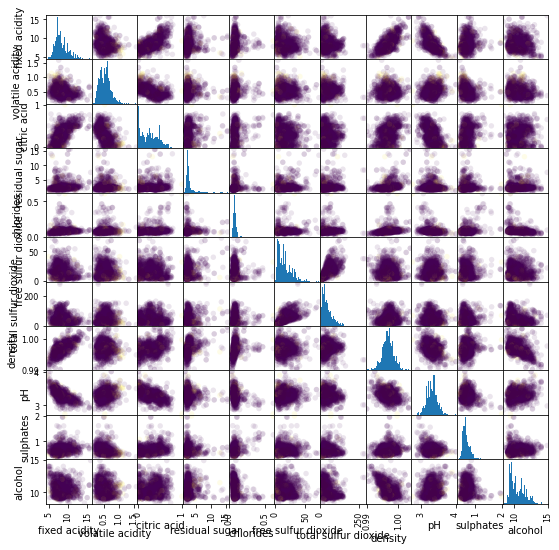

In [7]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9),c = pd.get_dummies(df['quality']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.savefig('../figures/scattermatrix2.jpg', dpi = 300)
plt.show()

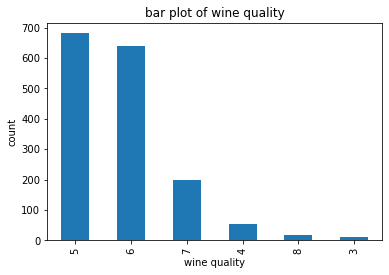

In [8]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

pd.value_counts(df['quality']).plot.bar()
plt.ylabel('count')
plt.xlabel('wine quality')
plt.title('bar plot of wine quality')
plt.savefig('../figures/qualitybar.jpg', dpi = 300)
plt.show()

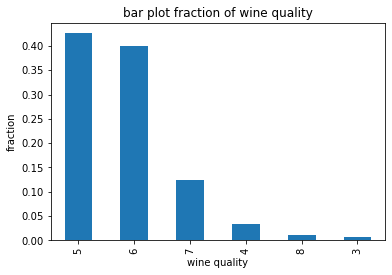

In [9]:
pd.value_counts(df['quality'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('wine quality')
plt.title('bar plot fraction of wine quality')
plt.savefig('../figures/qualitybarfraction.jpg', dpi = 300)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

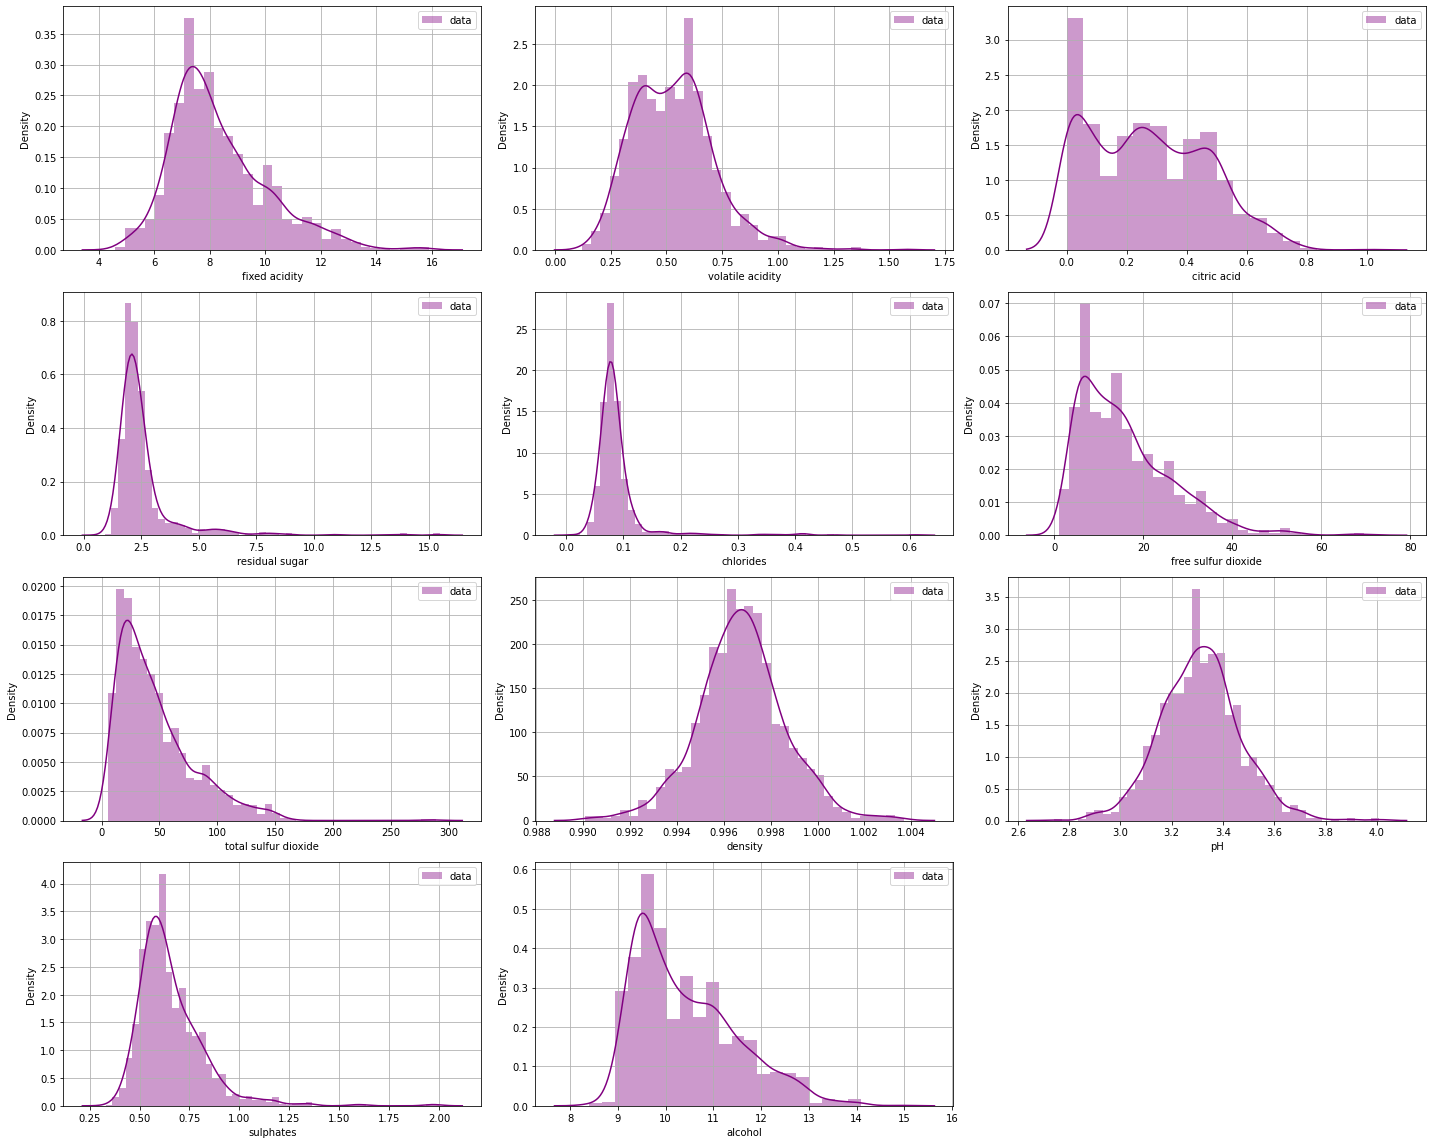

In [23]:
df_tem = df.loc[:, df.columns != 'quality']
plt.figure(figsize=(20,16))
for i, col in enumerate(list(df_tem.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(df_tem[col], color = 'purple', kde = True, label = 'data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()
plt.savefig('../figures/estimated PDF.jpg', dpi = 300)

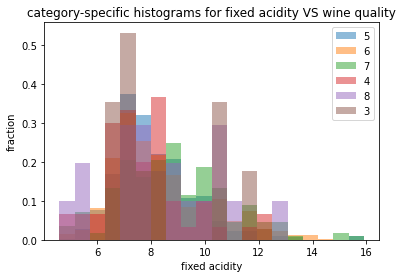

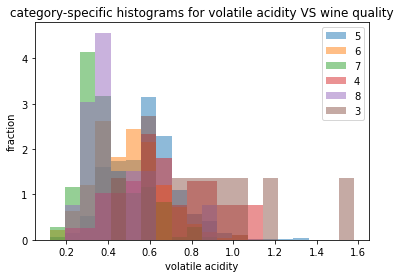

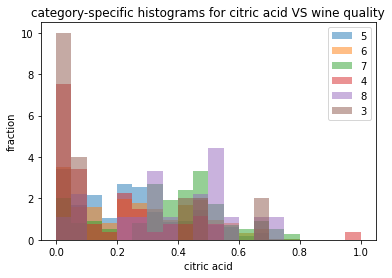

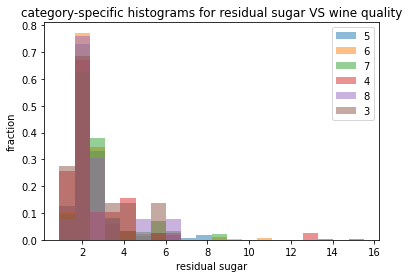

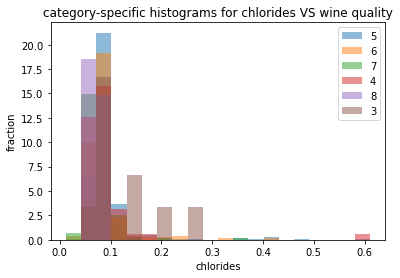

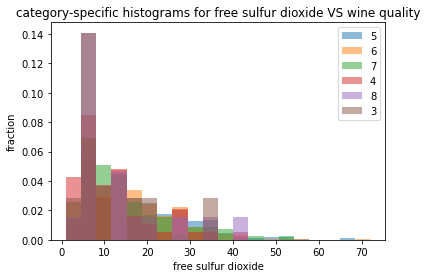

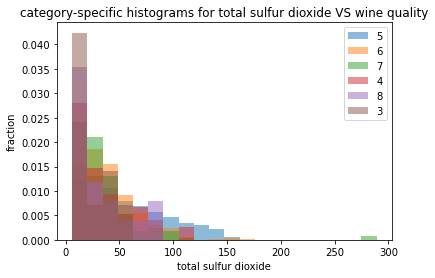

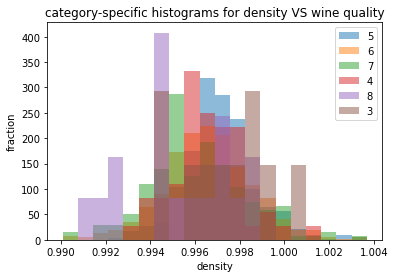

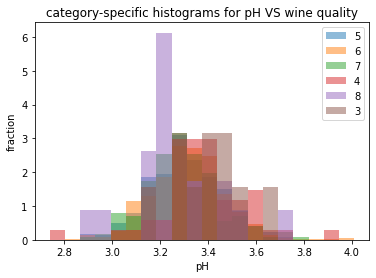

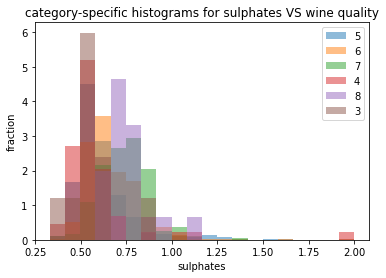

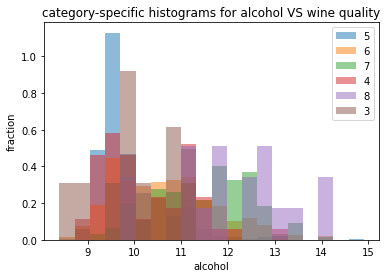

In [11]:
import matplotlib
from matplotlib import pylab as plt

col = df.loc[:, df.columns != 'quality'].columns

for i in col[0:]:
    categories = df['quality'].unique()
    bin_range = (df[i].min(),df[i].max())
    for c in categories:
        plt.hist(df[df['quality']==c][i],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('fraction')
    plt.xlabel(i)
    plt.title('category-specific histograms for ' + i + ' VS wine quality')
    plt.savefig('../figures/csh_' + i + ' VS quality.jpg', dpi = 300)
    plt.show()

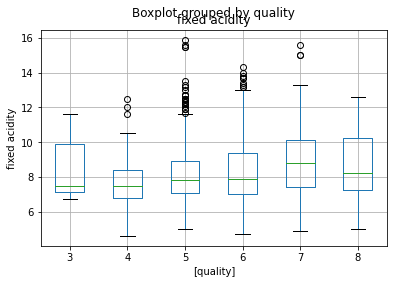

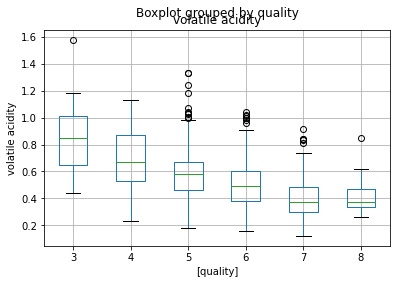

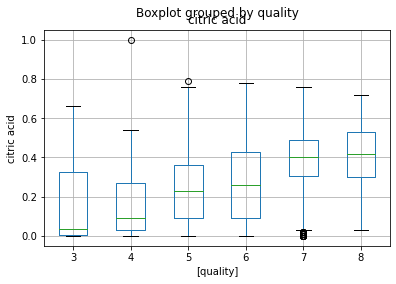

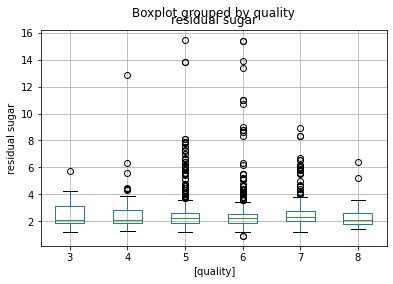

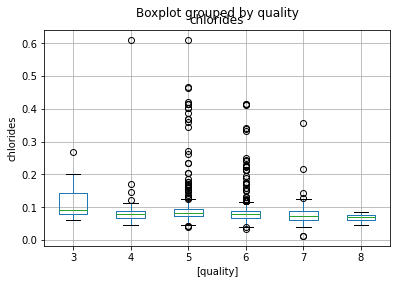

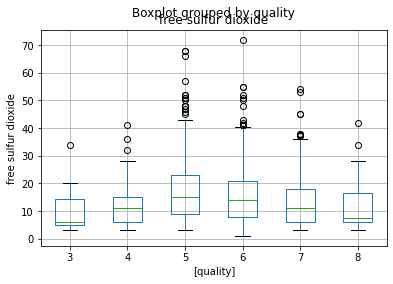

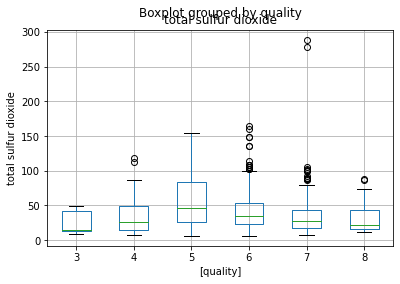

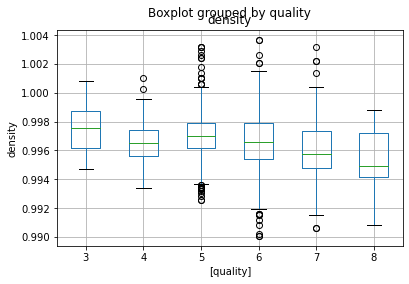

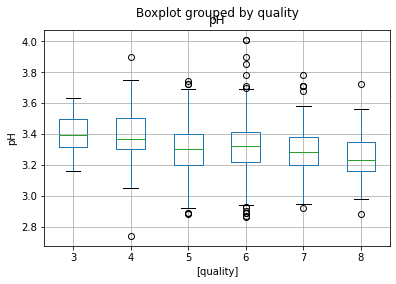

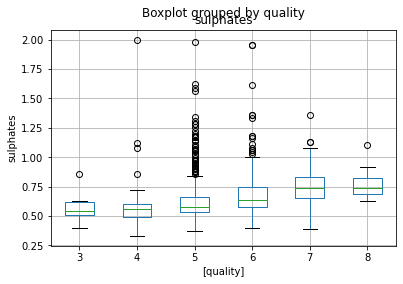

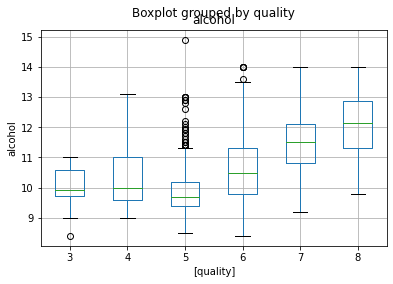

In [12]:
for i in col[0:]:
    df[[i,'quality']].boxplot(by='quality')
    plt.ylabel(i)
    plt.savefig('../figures/boxplot_' + i + ' VS quality.jpg', dpi = 300)
    plt.show()


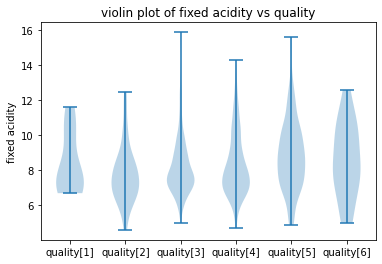

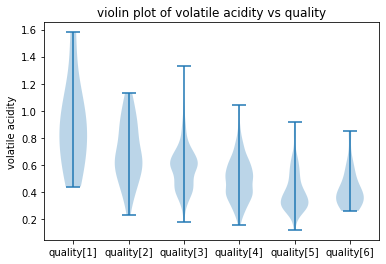

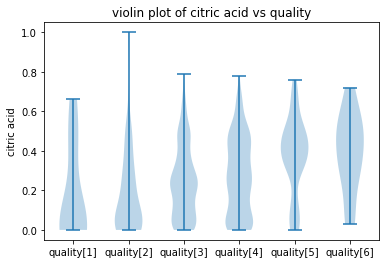

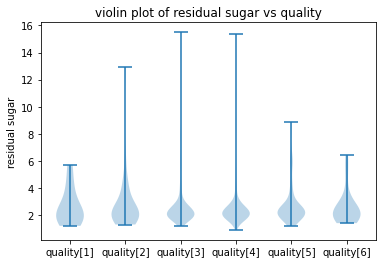

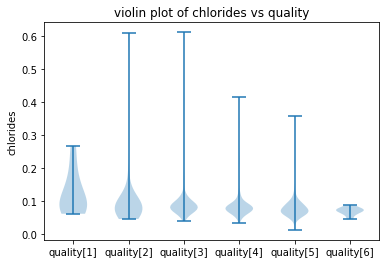

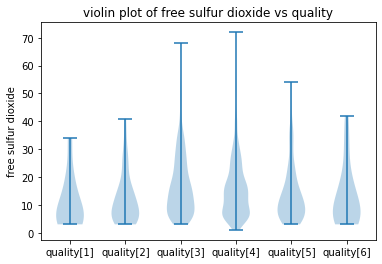

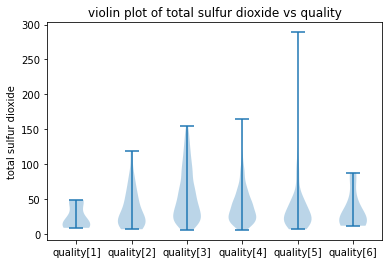

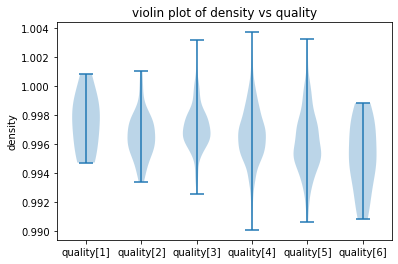

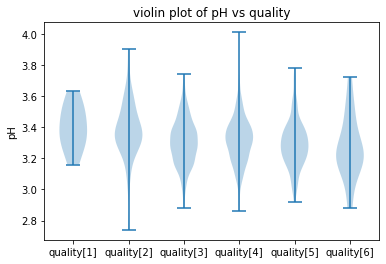

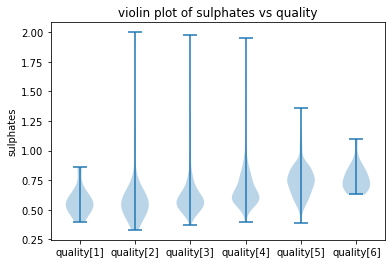

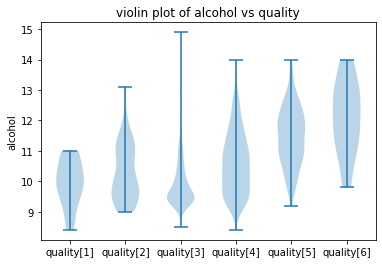

In [30]:
for i in col[0:]:  
    dataset = [df[df['quality'] == 3][i].values,
           df[df['quality'] == 4][i].values,
           df[df['quality'] == 5][i].values,
           df[df['quality'] == 6][i].values,
           df[df['quality'] == 7][i].values,
           df[df['quality'] == 8][i].values]
        
    plt.violinplot(dataset = dataset)
    plt.xticks([1,2,3,4,5,6],['quality[1]','quality[2]','quality[3]','quality[4]','quality[5]','quality[6]'])
    plt.ylabel(i)
    plt.title('violin plot of ' + i + ' vs quality')
    plt.savefig('../figures/violinplot_' + i + ' VS quality.jpg', dpi = 300)
    plt.show()

In [2]:
#create classify function to split quality into three level, poor, median, and high
def classify(quality):
    if quality <= 4:
        return 'poor'
    if quality == 5 or quality == 6:
        return 'median'
    if quality >= 7:
        return 'high'


In [3]:
df['quality'] = df['quality'].apply(classify)
df['quality']

0       median
1       median
2       median
3       median
4       median
         ...  
1594    median
1595    median
1596    median
1597    median
1598    median
Name: quality, Length: 1599, dtype: object

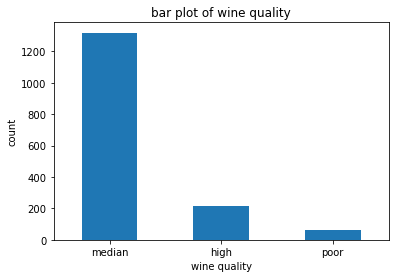

In [47]:
pd.value_counts(df['quality']).plot.bar()
plt.ylabel('count')
plt.xlabel('wine quality')
plt.title('bar plot of wine quality')
plt.xticks(rotation=360)
plt.savefig('../figures/new_barplot of quality.jpg', dpi = 300)
plt.show()

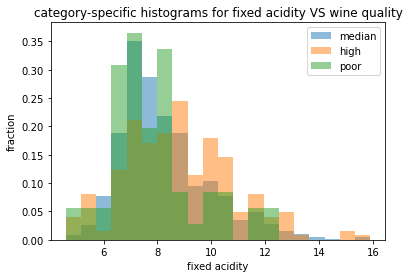

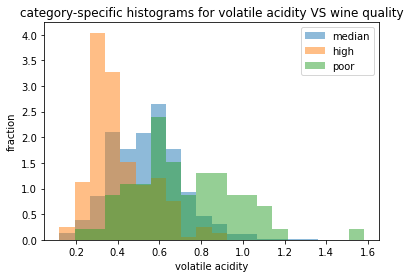

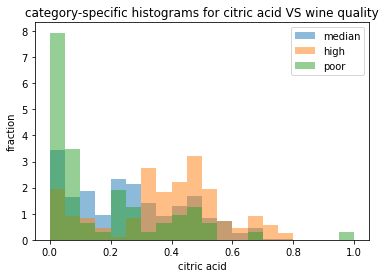

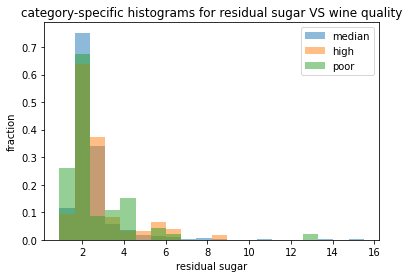

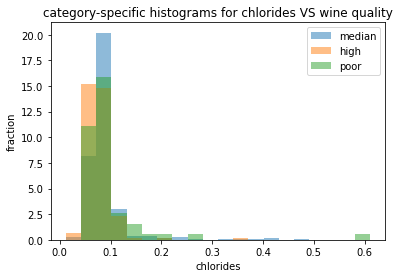

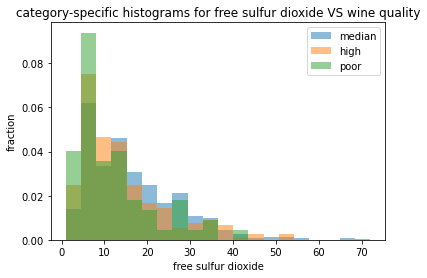

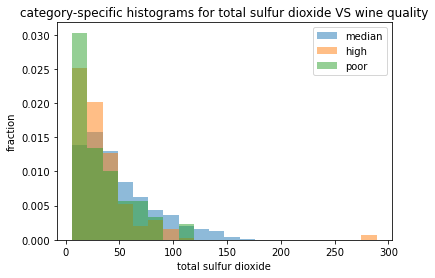

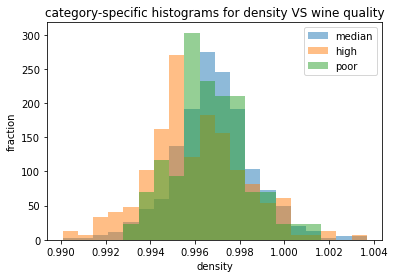

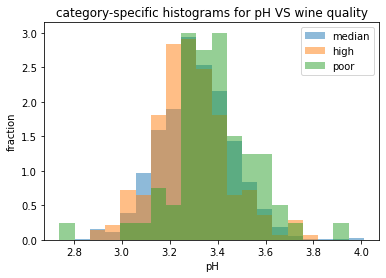

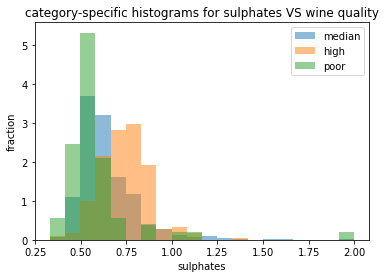

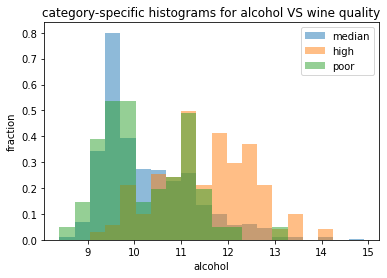

In [6]:
col_new = df.loc[:, df.columns !='quality'].columns

for i in col_new[0:]:
    categories = df['quality'].unique()
    bin_range = (df[i].min(),df[i].max())
    for c in categories:
        plt.hist(df[df['quality']==c][i],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('fraction')
    plt.xlabel(i)
    plt.title('category-specific histograms for ' + i + ' VS wine quality')
    plt.savefig('../figures/new_csh_' + i + ' VS quality.jpg', dpi = 300)
    plt.show()

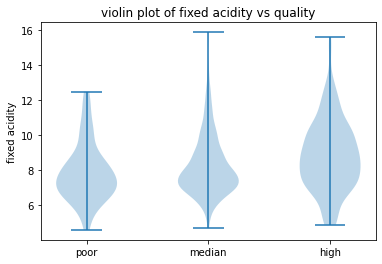

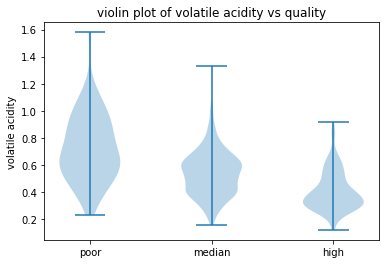

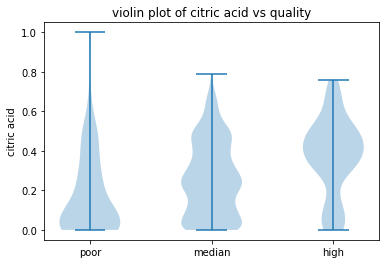

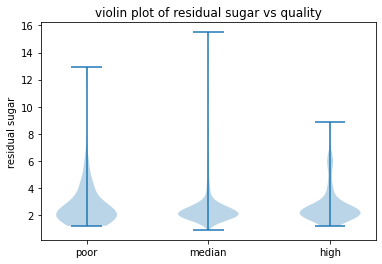

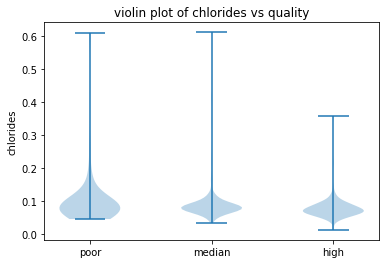

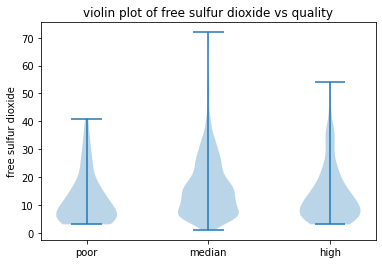

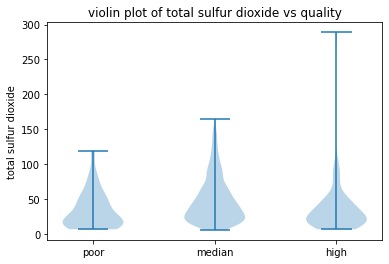

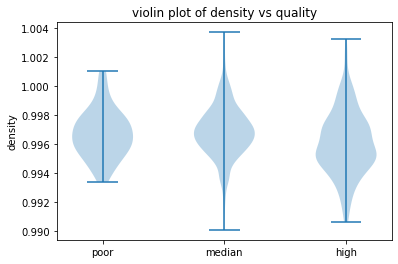

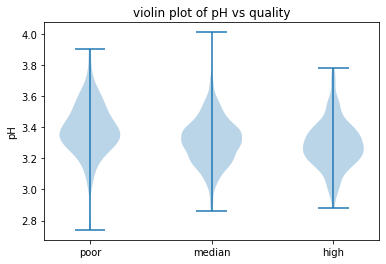

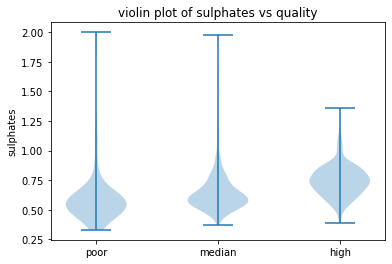

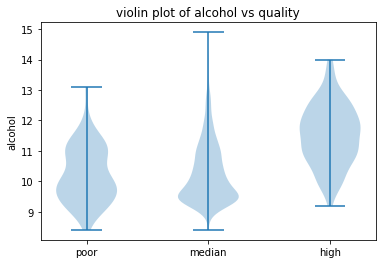

In [42]:
for i in col_new[0:]:
    dataset = [df[df['quality'] == 'poor'][i].values,
           df[df['quality'] == 'median'][i].values,
           df[df['quality'] == 'high'][i].values]
    plt.violinplot(dataset = dataset)
    plt.xticks([1,2,3],['poor','median','high'])
    plt.ylabel(i)
    plt.title('violin plot of ' + i + ' vs quality')
    plt.savefig('../figures/new violinplot_' + i +' VS quality.jpg', dpi = 300)
    plt.show()

In [47]:
from sklearn.model_selection import StratifiedKFold

# stratified K Fold
y = df['quality'] 
X = df.loc[:, df.columns != 'quality'] 

random_state = 42

final_split = []

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('val balance:')
    print(y_val.value_counts(normalize=True))
    
    data_split = {'final_train':[],'final_val':[], 'final_test': []}
    
    std_ftrs = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    scaler = StandardScaler()
    print(scaler.fit_transform(X_train[std_ftrs]))
    print(scaler.transform(X_val[std_ftrs]))
    print(scaler.transform(X_test[std_ftrs]))
    
    data_split['final_train'].append([X_train, y_train])
    data_split['final_val'].append([X_val, y_val])
    data_split['final_test'].append([X_test, y_test])
        
    final_split.append(data_split)
    
final_split

test balance: median quality    0.825000
high quality      0.134375
poor quality      0.040625
Name: quality, dtype: float64
train balance:
median quality    0.825024
high quality      0.135875
poor quality      0.039101
Name: quality, dtype: float64
val balance:
median quality    0.824219
high quality      0.136719
poor quality      0.039062
Name: quality, dtype: float64
[[ 0.09839978 -1.02805113  0.66871571 ...  0.42550964  0.03301014
   1.07307274]
 [-0.94654459 -0.36252586 -0.16351808 ...  0.49076168 -0.34082058
   0.14522391]
 [-1.46901677 -1.30535333 -0.05948885 ...  0.49076168 -0.71465131
   2.83598552]
 ...
 [ 0.09839978 -0.30706542 -0.00747424 ... -1.01003526  1.21680743
   0.60914833]
 [-0.5982298   0.35845985 -0.05948885 ... -0.22701077 -0.83926155
  -0.50427027]
 [-0.48212487  0.46938073 -0.05948885 ... -0.09650668 -0.77695643
  -0.59705515]]
[[ 0.73697689  1.35674775 -0.78769341 ... -0.09650668 -0.0916001
  -0.04034585]
 [ 0.3886621   1.43993841 -0.16351808 ... -0.16175873

[{'final_train': [[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
    1086            8.5             0.340         0.40             4.7      0.055   
    1326            6.7             0.460         0.24             1.7      0.077   
    1126            5.8             0.290         0.26             1.7      0.063   
    109             8.1             0.785         0.52             2.0      0.122   
    1328            6.5             0.520         0.11             1.8      0.073   
    ...             ...               ...          ...             ...        ...   
    702             7.0             0.640         0.02             2.1      0.067   
    1133            7.2             0.480         0.07             5.5      0.089   
    964             8.5             0.470         0.27             1.9      0.058   
    1397            7.3             0.590         0.26             2.0      0.080   
    1305            7.5             0.610         